In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\Dell\Documents\shifna\titanic_dataset (1).csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
for i in ['Cabin','Embarked',]:
    data[i]=data[i].fillna(data[i].mode()[0])

In [9]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

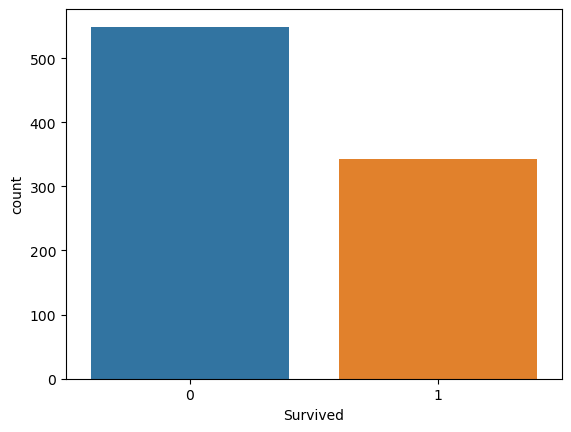

In [10]:
sns.countplot(x='Survived', data=data);

In [11]:
data.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

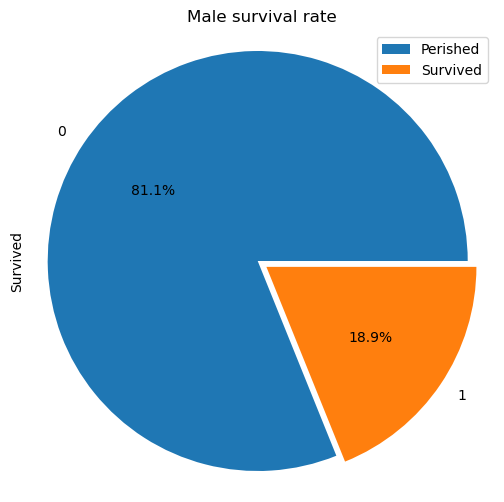

In [12]:
data[data['Sex'] == 'male'].Survived.groupby(data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show()

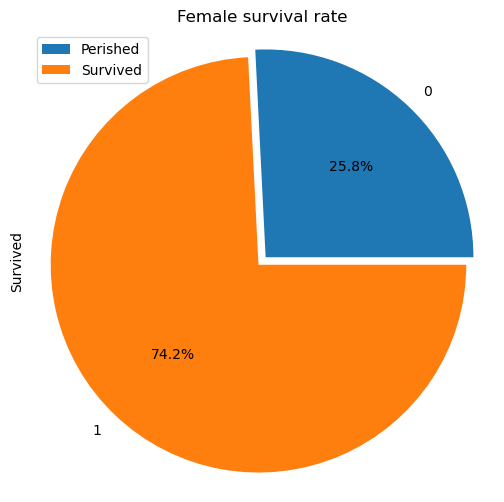

In [13]:
data[data['Sex'] == 'female'].Survived.groupby(data.Survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","Survived"])
plt.show()

In [14]:
pd.crosstab(data.Pclass, data.Survived, margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


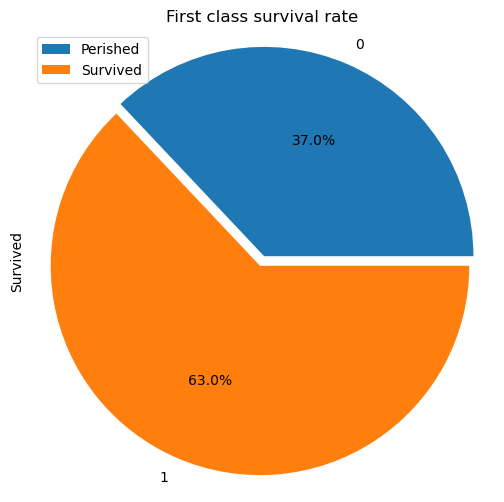

In [15]:
data[data['Pclass'] == 1].Survived.groupby(data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("First class survival rate")
plt.show()

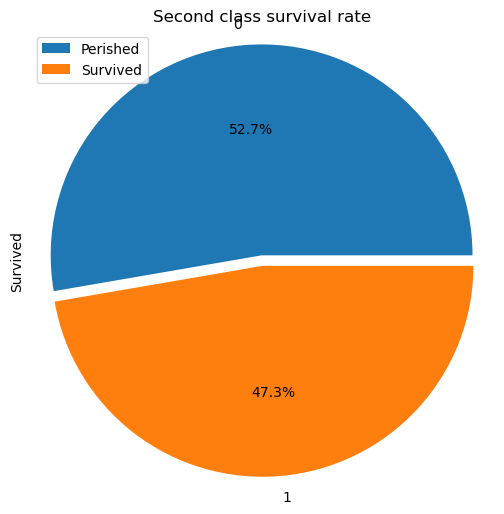

In [16]:
data[data['Pclass'] == 2].Survived.groupby(data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Second class survival rate")
plt.show()

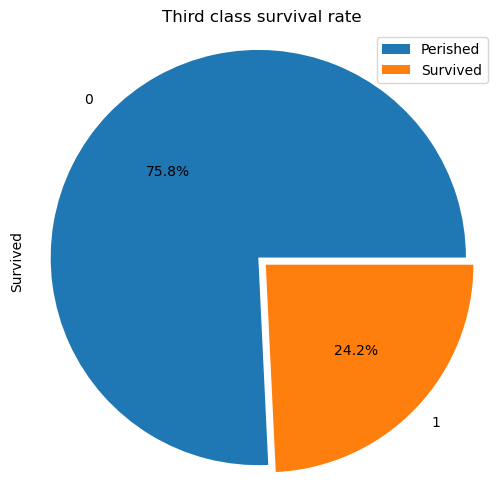

In [17]:
data[data['Pclass'] == 3].Survived.groupby(data.Survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Third class survival rate")
plt.show()

In [18]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

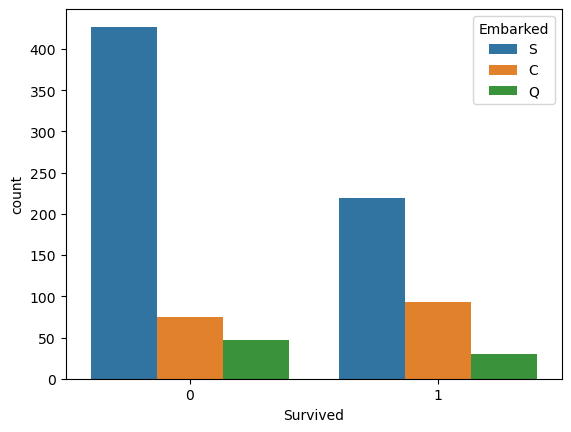

In [19]:
sns.countplot(x='Survived', data=data,hue = 'Embarked');

<Axes: xlabel='Pclass', ylabel='Fare'>

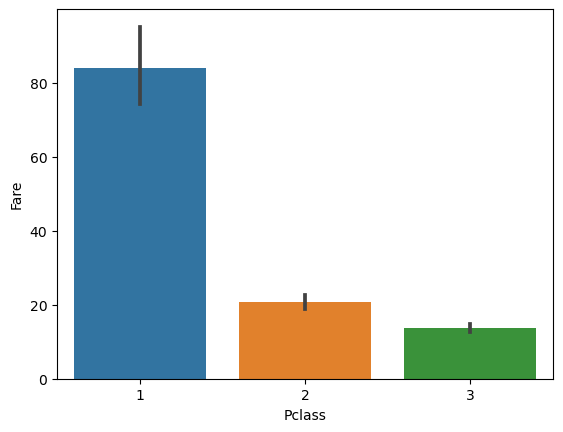

In [20]:
sns.barplot(y = "Fare",x = "Pclass",data = data)

<Axes: xlabel='Pclass', ylabel='Survived'>

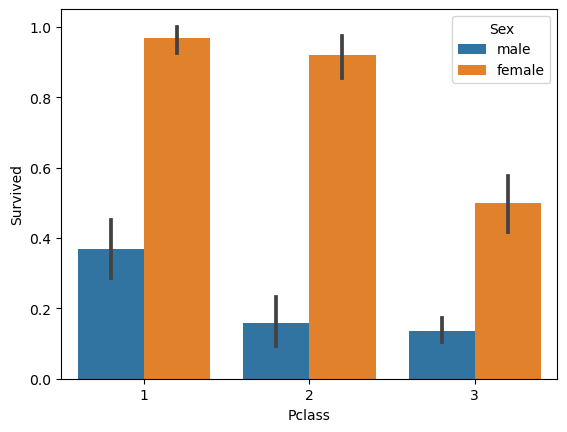

In [21]:
sns.barplot(y=data['Survived'],x=data['Pclass'],hue=data['Sex'])

In [22]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [23]:
data['PassengerId'].nunique()

891

In [24]:
data=data.drop('PassengerId',axis=1)

In [25]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [26]:

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Name']=label_encoder.fit_transform(data['Name'])

In [27]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,190,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,353,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,272,female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,15,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,303,female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,413,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,81,male,26.000000,0,0,111369,30.0000,C148,C


In [28]:
for i in ['Sex','Ticket','Cabin','Embarked',]:
    data[i]=label_encoder.fit_transform(data[i])

In [29]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.000000,1,0,523,7.2500,47,2
1,1,1,190,0,38.000000,1,0,596,71.2833,81,0
2,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,0,3,15,1,35.000000,0,0,472,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,27.000000,0,0,101,13.0000,47,2
887,1,1,303,0,19.000000,0,0,14,30.0000,30,2
888,0,3,413,0,29.699118,1,2,675,23.4500,47,2
889,1,1,81,1,26.000000,0,0,8,30.0000,60,0


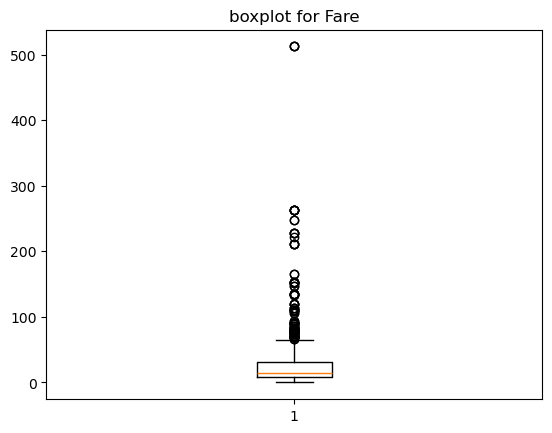

In [30]:
plt.boxplot(data['Fare'])
plt.title('boxplot for Fare')
plt.show()

In [31]:
Q1=np.percentile(data['Fare'],25)

In [32]:
Q1

7.9104

In [33]:
Q3=np.percentile(data['Fare'],75)

In [34]:
Q3

31.0

In [35]:
IQR=Q3-Q1

In [36]:
IQR

23.0896

In [37]:
low_limit=Q1-1.5*IQR

In [38]:
low_limit

-26.724

In [39]:
up_limit=Q3+1.5*IQR

In [40]:
up_limit

65.6344

In [41]:
outlier=[]
for x in data['Fare']:
    if((x>up_limit)or (x<low_limit)):
        outlier.append(x)

In [42]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [43]:
ind=data['Fare']>up_limit
index_list=data.loc[ind].index

In [44]:
data.drop(index_list,inplace=True)

In [45]:
data.shape

(775, 11)

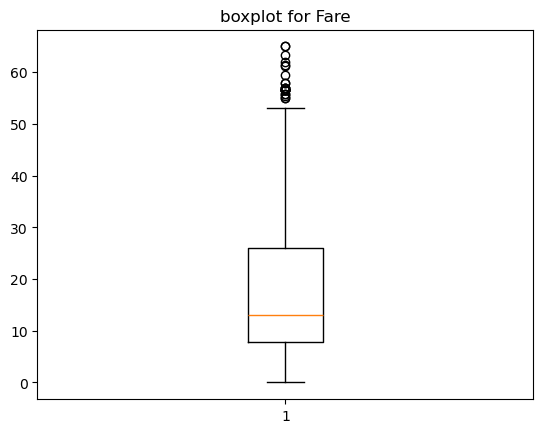

In [46]:
plt.boxplot(data['Fare'])
plt.title('boxplot for Fare')
plt.show()

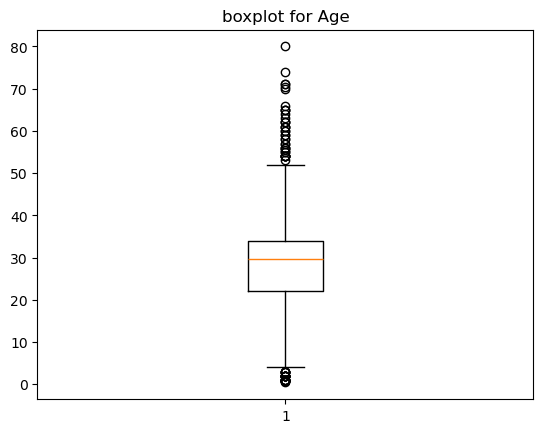

In [47]:
plt.boxplot(data['Age'])
plt.title('boxplot for Age')
plt.show()

In [48]:
Q1=np.percentile(data['Age'],25)

In [49]:
Q1

22.0

In [50]:
Q3=np.percentile(data['Age'],75)

In [51]:
Q3

34.0

In [52]:
IQR=Q3-Q1

In [53]:
IQR

12.0

In [54]:
low_limit=Q1-1.5*IQR

In [55]:
low_limit

4.0

In [56]:
up_limit=Q3+1.5*IQR

In [57]:
up_limit

52.0

In [58]:
outlier=[]
for x in data['Age']:
    if((x>up_limit)or (x<low_limit)):
        outlier.append(x)

In [59]:
outlier

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [60]:
ind=data['Age']>up_limit
index_list=data.loc[ind].index

In [61]:
ind=data['Age']<low_limit
index_list2=data.loc[ind].index

In [62]:
data.drop(index_list,inplace=True)

In [63]:
data.shape

(736, 11)

In [64]:
data.drop(index_list2,inplace=True)

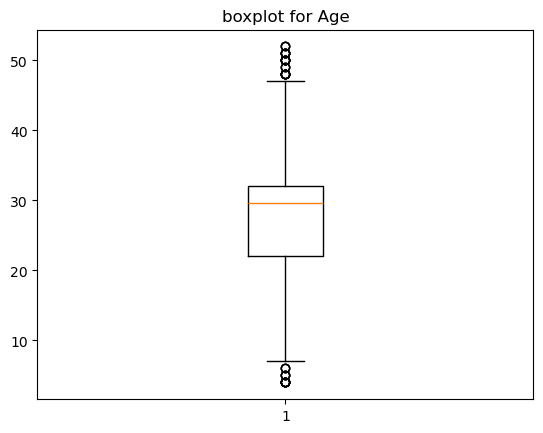

In [65]:
plt.boxplot(data['Age'])
plt.title('boxplot for Age')
plt.show()

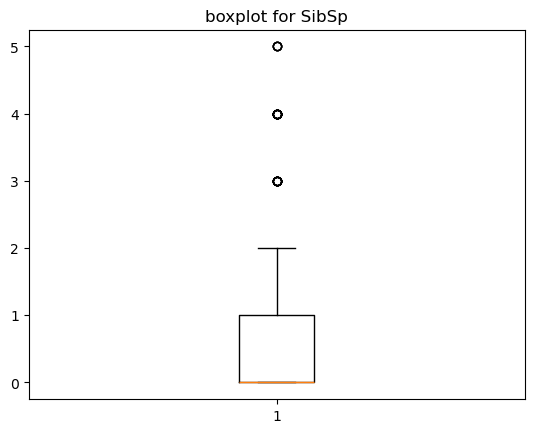

In [66]:
plt.boxplot(data['SibSp'])
plt.title('boxplot for SibSp')
plt.show()

In [67]:
Q1=np.percentile(data['SibSp'],25)

In [68]:
Q1

0.0

In [69]:
Q3=np.percentile(data['SibSp'],75)

In [70]:
Q3

1.0

In [71]:
IQR=Q3-Q1

In [72]:
IQR

1.0

In [73]:
low_limit=Q1-1.5*IQR

In [74]:
low_limit

-1.5

In [75]:
up_limit=Q3+1.5*IQR

In [76]:
up_limit

2.5

In [77]:
outlier=[]
for x in data['SibSp']:
    if((x>up_limit)or (x<low_limit)):
        outlier.append(x)

In [78]:
outlier

[3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4]

In [79]:
ind=data['SibSp']>up_limit
index_list=data.loc[ind].index

In [80]:
data.drop(index_list,inplace=True)

In [81]:
data.shape

(681, 11)

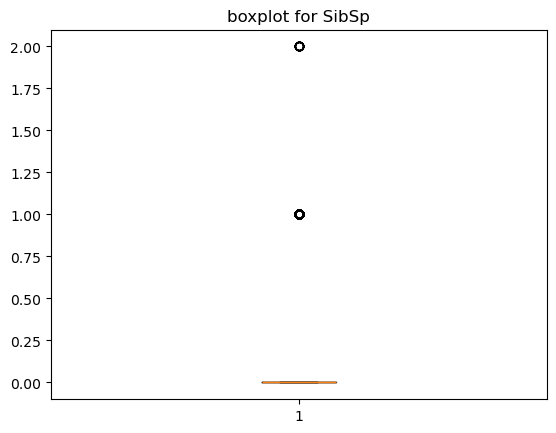

In [82]:
plt.boxplot(data['SibSp'])
plt.title('boxplot for SibSp')
plt.show()

In [83]:
data['SibSp'].nunique()


3

In [84]:
data['Parch'].nunique()

7

In [85]:
data['Cabin'].nunique()

73

In [86]:
data['Embarked'].nunique()

3

In [87]:
data['Pclass'].nunique()

3

In [88]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,108,1,22.000000,1,0,523,7.2500,47,2
2,1,3,353,0,26.000000,0,0,669,7.9250,47,2
3,1,1,272,0,35.000000,1,0,49,53.1000,55,2
4,0,3,15,1,35.000000,0,0,472,8.0500,47,2
5,0,3,554,1,29.699118,0,0,275,8.4583,47,1


In [89]:
data=data.reset_index(drop=True)

In [90]:
x1=data.drop(['Survived','Pclass','Sex','SibSp','Parch','Embarked'],axis=1)

In [91]:
x1

,Name,Age,Ticket,Fare,Cabin
0,108,22.000000,523,7.2500,47
1,353,26.000000,669,7.9250,47
2,272,35.000000,49,53.1000,55
3,15,35.000000,472,8.0500,47
4,554,29.699118,275,8.4583,47
...,...,...,...,...,...
676,548,27.000000,101,13.0000,47
677,303,19.000000,14,30.0000,30
678,413,29.699118,675,23.4500,47
679,81,26.000000,8,30.0000,60


In [92]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
x1=min_max.fit_transform(x1)

In [93]:
x1

array([[0.12134831, 0.375     , 0.76957164, 0.11153846, 0.32191781],
       [0.39662921, 0.45833333, 0.98522895, 0.12192308, 0.32191781],
       [0.30561798, 0.64583333, 0.06942393, 0.81692308, 0.37671233],
       ...,
       [0.46404494, 0.53539828, 0.99409158, 0.36076923, 0.32191781],
       [0.09101124, 0.45833333, 0.00886263, 0.46153846, 0.4109589 ],
       [0.24719101, 0.58333333, 0.68537666, 0.11923077, 0.32191781]])

In [94]:
x1=pd.DataFrame(x1)

In [95]:
x1

,0,1,2,3,4
0,0.121348,0.375000,0.769572,0.111538,0.321918
1,0.396629,0.458333,0.985229,0.121923,0.321918
2,0.305618,0.645833,0.069424,0.816923,0.376712
3,0.016854,0.645833,0.694239,0.123846,0.321918
4,0.622472,0.535398,0.403250,0.130128,0.321918
...,...,...,...,...,...
676,0.615730,0.479167,0.146233,0.200000,0.321918
677,0.340449,0.312500,0.017725,0.461538,0.205479
678,0.464045,0.535398,0.994092,0.360769,0.321918
679,0.091011,0.458333,0.008863,0.461538,0.410959


In [96]:
x=data.drop(['Name','Age','Ticket','Fare','Cabin'],axis=1)

In [97]:
x.isna().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [98]:
x1.describe()

,0,1,2,3,4
count,681.000000,681.000000,681.000000,681.000000,681.000000
mean,0.500510,0.521062,0.501567,0.255243,0.357472
std,0.285362,0.189149,0.283519,0.204008,0.148291
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253933,0.395833,0.258493,0.120834,0.321918
50%,0.497753,0.535398,0.499261,0.161538,0.321918
75%,0.739326,0.604167,0.741507,0.357692,0.321918
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
x1=pd.concat([x1,x],axis=1)

In [100]:
x1

,0,1,2,3,4,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0.121348,0.375000,0.769572,0.111538,0.321918,0,3,1,1,0,2
1,0.396629,0.458333,0.985229,0.121923,0.321918,1,3,0,0,0,2
2,0.305618,0.645833,0.069424,0.816923,0.376712,1,1,0,1,0,2
3,0.016854,0.645833,0.694239,0.123846,0.321918,0,3,1,0,0,2
4,0.622472,0.535398,0.403250,0.130128,0.321918,0,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
676,0.615730,0.479167,0.146233,0.200000,0.321918,0,2,1,0,0,2
677,0.340449,0.312500,0.017725,0.461538,0.205479,1,1,0,0,0,2
678,0.464045,0.535398,0.994092,0.360769,0.321918,0,3,0,1,2,2
679,0.091011,0.458333,0.008863,0.461538,0.410959,1,1,1,0,0,0


In [101]:
x1.columns=['Name','Age','Ticket','Fare','Cabin','Survived','Pclass','Sex','SibSp','Parch','Embarked']

In [102]:
x1

,Name,Age,Ticket,Fare,Cabin,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0.121348,0.375000,0.769572,0.111538,0.321918,0,3,1,1,0,2
1,0.396629,0.458333,0.985229,0.121923,0.321918,1,3,0,0,0,2
2,0.305618,0.645833,0.069424,0.816923,0.376712,1,1,0,1,0,2
3,0.016854,0.645833,0.694239,0.123846,0.321918,0,3,1,0,0,2
4,0.622472,0.535398,0.403250,0.130128,0.321918,0,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
676,0.615730,0.479167,0.146233,0.200000,0.321918,0,2,1,0,0,2
677,0.340449,0.312500,0.017725,0.461538,0.205479,1,1,0,0,0,2
678,0.464045,0.535398,0.994092,0.360769,0.321918,0,3,0,1,2,2
679,0.091011,0.458333,0.008863,0.461538,0.410959,1,1,1,0,0,0
